# 1D model

## TODO 
* Then, start with a known signal in the real domain, take the DFT of that and then those are my point sources. This way we know what the actual signal is when we inverse Fourier transform the interpolated signal at the end (before dividing by sinc^2)

In [136]:
%load_ext autoreload
%autoreload 2
import site
import sys
import time
site.addsitedir('..')
from jax.config import config

config.update("jax_enable_x64", True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
import numpy as np
from  matplotlib import pyplot as plt

In [176]:
# Signal in spatial domain

x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x) + 1/2*np.sin(x*2)
x[-1]

6.2

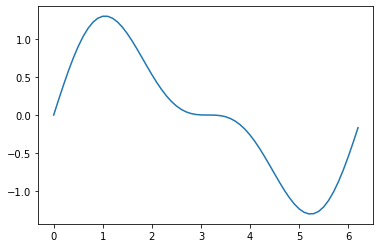

In [139]:
plt.plot(x,y)

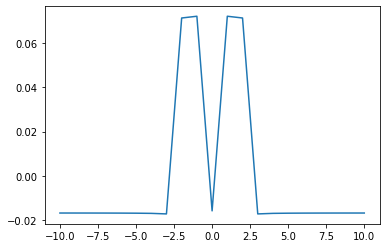

In [161]:
# Undersample and take FFT
idx = np.arange(0, len(x), 3)

Y = np.fft.fft(y[idx])
Y = np.fft.fftshift(Y)

M = len(Y)
t = np.fft.fftfreq(M, 1/M)
t = np.fft.fftshift(t)

plt.plot(t, np.real(Y))

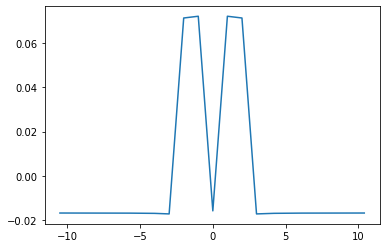

In [163]:
# Interpolate on a finder grid in Fourier

tf, Yf = interp_sig(t,Y)
plt.plot(tf,np.real(Yf))

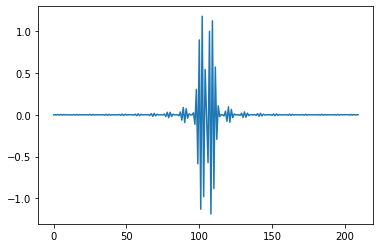

In [186]:
# Back to spatial domain. Looks weird
yf = np.fft.ifftshift((np.fft.ifft(Yf)))

#xf = np.linspace(x[0], x[-1], len(yf))
#s = np.sinc(xf)

plt.plot(np.real(yf))

In [187]:
def lin_interp(x, x0, x1, y0, y1):
    return (x-x0)*(y1-y0)/(x1-x0) + y0

In [188]:
def interp_sig(t, a):
    """ t: the (fftshifted) coordinates
      a: the (fftshifted) signal to interpolate
      N: the length of de interpolated signal"""
      
    N = len(t)
      
    tf = np.arange(-N/2, N/2, 0.1)
    Ff = np.zeros(tf.shape, dtype=np.complex64)

    eps = 1e-14
    for i in range(N):
        i0 = np.mod(i, N)
        i1 = np.mod(i+1, N)
        x0 = t[i0]
        x1 = t[i1]
        y0 = a[i0]
        y1 = a[i1]
    
        for j in range(len(tf)):
            pt = tf[j]
        
            if i == N-1:
                x1 = t[i1] + N
                if pt < t[0]:
                    pt = tf[j] + N
        
            if np.abs(pt - x0) < 1e-15:
                Ff[j] = y0
            elif np.abs(pt - x1) < 1e-15:
                Ff[j] = y1
            elif pt > x0 and pt < x1:
                Ff[j] = lin_interp(pt, x0, x1, y0, y1)  
                
    return tf, Ff

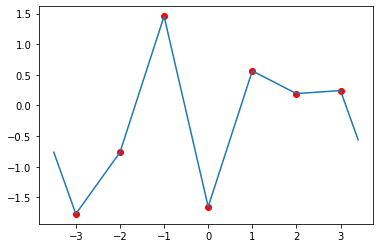

In [189]:
# Test the interpolation function
def test_interp_sig():
    N = 7
    t = np.fft.fftfreq(N, 1/N)
    a = np.random.randn(N) 

    t = np.fft.fftshift(t)
    a = np.fft.fftshift(a)

    tf, Ff = interp_sig(t, a)

    plt.plot(t, a, 'or')
    plt.plot(tf, np.real(Ff))
    return

test_interp_sig()